In [26]:
import torch, torch.nn as nn, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import seaborn as sns
iris = sns.load_dataset('iris')

data = torch.tensor(iris[iris.columns[0:4]].values).float()
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [27]:
def createModel():
    model = nn.Sequential(
        nn.Linear(4,128),
        nn.ReLU(),
        nn.Linear(128,128),
        nn.ReLU(),
        nn.Linear(128,3)
    )

    lossfun = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=.01)
    return model, lossfun, optimizer

In [28]:
import torch.utils
import torch.utils.data


numepochs = 200
losses = torch.zeros(numepochs)
trainAcc = []
testAcc  = []

train_data,test_data, train_labels,test_labels = train_test_split(data,labels,train_size=.8)

train_data = torch.utils.data.TensorDataset(train_data,train_labels)
test_data  = torch.utils.data.TensorDataset(test_data,test_labels)

train_loader = DataLoader(train_data,shuffle=True,batch_size=12)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [29]:
def CrM():
    model = nn.Sequential(
        nn.Linear(4, 64),
        nn.ReLU(),
        nn.Linear(64, 64),
        nn.ReLU(),
        nn.Linear(64, 3)
    )
    lossfun = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(),lr=.01)
    return model,lossfun,optimizer

In [30]:
# Train The Model
# Global Parameters
numepochs = 500

def trM():
    trainAcc = []
    testAcc = []
    for epochi in range(numepochs):
        batchAcc = []

        for X,y in train_loader:
            yHat = model(X)
            loss = lossfun(yHat,y) 

            # Backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Compute Training Accuracy just for this batch
            batchAcc.append(100*torch.mean((torch.argmax(yHat,axis=1) == y).float()).item())
        trainAcc.append(np.mean(batchAcc))
        X,y = next(iter(test_loader))
        predlabels = torch.argmax(model(X),axis=1)
        testAcc.append(100*torch.mean((predlabels == y).float()).item())
    return trainAcc,testAcc


In [31]:
model,lossfun,optimizer = CrM()
trainAcc,testAcc = trM()

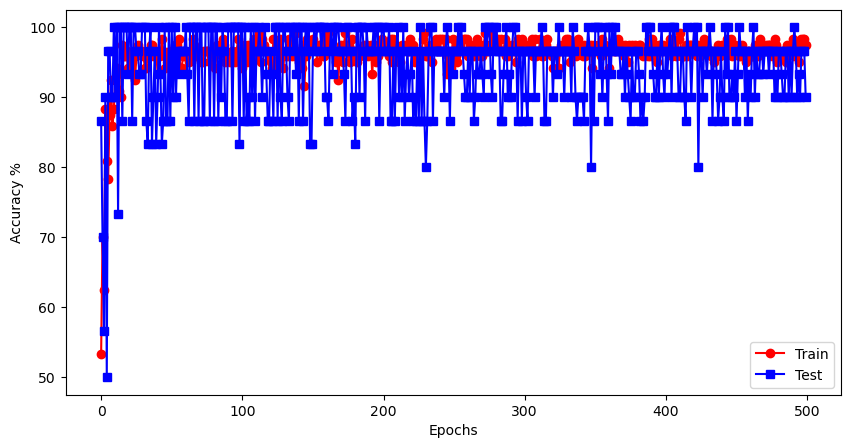

In [32]:
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc, 'ro-')
plt.plot(testAcc, 'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy %')
plt.legend(['Train','Test'])

plt.show()